In [1]:
import pandas as pd
import json

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [20]:
with open('idioms_in_dicts.json', 'r', encoding='UTF-8') as f:
    data = tuple(json.load(f))

In [3]:
abbrs = {'презрит', 'эвф', 'груб', 'шутл-ирон', 'инф', 'ит', 'вульг', 'грубо-прост', 'канц', 'фр', 'мор', 'бран', 'поэт', 'устар', 'неодобрит', 'высок', 'одобр', 'шутл-фамильярн', 'этногр', 'ритор', 'книжн', 'восторж', 'этикет ф', 'посл', 'прост', 'библ', 'жарг', 'обл', 'шахм', 'офиц', 'миф', 'погов', 'юр', 'лит', 'доревол', 'перен', 'нов', 'фольк', 'спец', 'предосуд', 'еванг', 'лат', 'публиц', 'торж', 'греч', 'греч миф', 'спорт', 'англ', 'араб', 'ист', 'воен', 'др-греч', 'уничиж', 'пренебр', 'нем', 'пориц', 'разг', 'фам', 'экспрес', 'физ', 'театр', 'народно-поэт', 'церк-слав', 'охот', 'детск', 'иpoн', 'церк', 'шутл', 'филос', 'рел'}
len(abbrs)

70

In [4]:
'''df = pd.DataFrame(columns=['phrase', 'meaning', 'dictionary'] + sorted(list(abbrs)))
for phrase_dict in data:
    semantics_set = phrase_dict['semantics']
    for meaning_dict in semantics_set:
        if 'abbr' in meaning_dict and 'dictionary' in meaning_dict:
            df.loc[len(df)] = [phrase_dict['phrase'],
                               meaning_dict['meaning'],
                               meaning_dict['dictionary']] + [True if abbr in meaning_dict['abbr'] else False for abbr in sorted(list(abbrs))]'''

"df = pd.DataFrame(columns=['phrase', 'meaning', 'dictionary'] + sorted(list(abbrs)))\nfor phrase_dict in data:\n    semantics_set = phrase_dict['semantics']\n    for meaning_dict in semantics_set:\n        if 'abbr' in meaning_dict and 'dictionary' in meaning_dict:\n            df.loc[len(df)] = [phrase_dict['phrase'],\n                               meaning_dict['meaning'],\n                               meaning_dict['dictionary']] + [True if abbr in meaning_dict['abbr'] else False for abbr in sorted(list(abbrs))]"

In [5]:
'''row_labels = []
label_combinations = []
for ind, row in df.loc[:, 'англ': 'юр'].iterrows():
    row_labels.append(len(row[row].index))
    label_combinations.append(tuple(row[row].index))

df['label_counts'] = row_labels
df['label_combinations'] = label_combinations'''

"row_labels = []\nlabel_combinations = []\nfor ind, row in df.loc[:, 'англ': 'юр'].iterrows():\n    row_labels.append(len(row[row].index))\n    label_combinations.append(tuple(row[row].index))\n\ndf['label_counts'] = row_labels\ndf['label_combinations'] = label_combinations"

In [6]:
'''df.to_csv('idioms_in_dicts.csv', sep=',', encoding='utf-8')'''

"df.to_csv('idioms_in_dicts.csv', sep=',', encoding='utf-8')"

In [7]:
df = pd.read_csv('idioms_in_dicts.csv', sep=',')

найти разницу в количестве разных помет в разных словарях у одной фразы.
1. найти разницу в наборе помет и посчитать его длину
2. какие пометы часто взаивозаменяемы?
кортеж, первый элемент -- пометы из 1 словаря (список), второй -- и второго ...
find_difference ---> новый словарь, индекс -- ключ, список разниц значение.

In [8]:
df_grouped = df.groupby(['phrase'])
labels = []

i = 0
for name, group in df_grouped:
    #labels.append([name] + list(group['label_combinations'].apply(lambda x: str(x))))
    labels.append([name] + list(group['label_combinations']))
    i += 1

In [9]:
labels

[["['Митькой звали']", "('прост', 'экспрес')", '()', "('прост',)"],
 ["['а был ли мальчик?']", "('разг', 'экспрес')", '()'],
 ["['абы как']", "('пренебр', 'прост')", "('прост',)"],
 ["['авось да небось']", "('прост',)", "('погов', 'прост')"],
 ["['адамово яблоко']", "('устар',)", "('книжн',)"],
 ["['административный восторг']",
  "('иpoн',)",
  "('иpoн',)",
  "('иpoн', 'неодобрит')"],
 ["['аж небу жарко']", "('разг', 'экспрес')", '()'],
 ["['азбучная истина']", "('экспрес',)", '()'],
 ["['акции падают', 'акции упали']", '()', '()'],
 ["['акции повысились', 'акции повышаются']", '()', '()'],
 ["['аника-воин']", "('иpoн', 'прост')", '()'],
 ["['аннибалова клятва']", "('книжн', 'экспрес')", "('книжн',)", "('книжн',)"],
 ["['антик с гвоздикой']",
  "('устар',)",
  "('одобр', 'разг', 'устар')",
  "('прост', 'устар', 'шутл')"],
 ["['ариаднина нить']", "('книжн',)", "('греч', 'греч миф', 'книжн')", '()'],
 ["['артист из погорелого театра', 'артист погорелого театра']",
  "('иpoн', 'разг')",
 

In [10]:
labels_difference = []
labels_same = []

for phrase in labels:
    if len(set(phrase[1:])) != 1:
        labels_difference.append(phrase)
    else:
        labels_same.append(phrase)

In [11]:
len(labels_difference), len(labels_same)

(2884, 394)

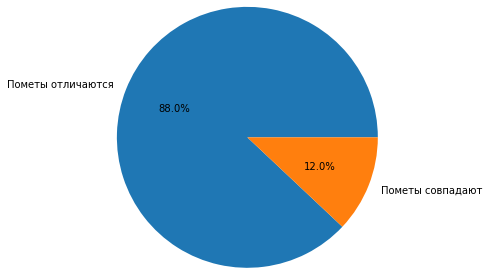

<Figure size 1440x1440 with 0 Axes>

In [12]:
plt.pie([len(labels_difference), len(labels_same)], labels = ['Пометы отличаются', 'Пометы совпадают'], autopct='%1.1f%%', radius=1.5)

plt.figure(figsize=(20, 20))
plt.show()


In [13]:
labels_one_empty = [p for p in labels_difference if len(p) == 3 and '()' in p ]
labels_two_empty = [p for p in labels_difference if len(p) == 4 and p.count('()') == 2 ]
labels_three_empty = [p for p in labels_difference if len(p) == 5 and p.count('()') == 3 ]
labels_four_empty = [p for p in labels_difference if len(p) == 6 and p.count('()') == 4 ]
labels_all_empty = [p for p in labels_difference if p.count('()') == len(p) - 1 ]

In [14]:
len(labels_one_empty), len(labels_two_empty), len(labels_three_empty), len(labels_four_empty), len(labels_all_empty)

(859, 204, 55, 9, 0)

In [15]:
labels_four_empty

[["['вывести из себя', 'выводить из себя']",
  "('экспрес',)",
  '()',
  '()',
  '()',
  '()'],
 ["['жребий брошен']", "('высок', 'экспрес')", '()', '()', '()', '()'],
 ["['из ряда вон выходящий']", "('экспрес',)", '()', '()', '()', '()'],
 ["['изо дня в день']", "('разг',)", '()', '()', '()', '()'],
 ["['на всякий случай']", "('разг',)", '()', '()', '()', '()'],
 ["['на каждом шагу']", "('разг', 'экспрес')", '()', '()', '()', '()'],
 ["['прочитать между строк', 'читать между строк']",
  "('экспрес',)",
  '()',
  '()',
  '()',
  '()'],
 ["['с лёгким сердцем']", "('разг', 'экспрес')", '()', '()', '()', '()'],
 ["['сердце кровью обливается']",
  "('разг', 'экспрес')",
  '()',
  '()',
  '()',
  '()']]

In [16]:
labels_no_empty = [p for p in labels_difference if '()' not in p ]

In [17]:
labels_no_empty

[["['абы как']", "('пренебр', 'прост')", "('прост',)"],
 ["['авось да небось']", "('прост',)", "('погов', 'прост')"],
 ["['адамово яблоко']", "('устар',)", "('книжн',)"],
 ["['административный восторг']",
  "('иpoн',)",
  "('иpoн',)",
  "('иpoн', 'неодобрит')"],
 ["['аннибалова клятва']", "('книжн', 'экспрес')", "('книжн',)", "('книжн',)"],
 ["['антик с гвоздикой']",
  "('устар',)",
  "('одобр', 'разг', 'устар')",
  "('прост', 'устар', 'шутл')"],
 ["['ахнуть не успел']", "('разг', 'экспрес')", "('разг',)"],
 ["['бабушка ещё надвое сказала', 'бабушка надвое сказала']",
  "('разг',)",
  "('погов',)",
  "('разг',)"],
 ["['бабьи сказки']", "('пренебр', 'прост')", "('иpoн', 'пренебр')"],
 ["['беда какой']", "('экспрес',)", "('прост',)"],
 ["['беда сколько']", "('прост', 'экспрес')", "('прост',)"],
 ["['беден как церковная крыса']", "('разг', 'экспрес')", "('разг',)"],
 ["['бедовая голова']", "('разг', 'экспрес')", "('прост', 'фольк')"],
 ["['без всяких-яких']", "('прост', 'экспрес')", "('пр

In [18]:
len(labels_no_empty)

1038

In [40]:
abbrs = []
total_abbrs = dict()
for phrase in data:
    all_abbrs = []
    for sem in phrase['semantics']:
        if 'abbr' in sem:
            all_abbrs.extend(sem['abbr'])
            
    for abbr in set(all_abbrs):
        total_abbrs[abbr] = total_abbrs.get(abbr, 0) + 1
        
    if len(all_abbrs) != 0:
        ph_dicts = [sem['dictionary'] for sem in phrase['semantics'] if 'dictionary' in sem]
        dict_all = {abbr: all_abbrs.count(abbr)*100/len(ph_dicts) for abbr in set(all_abbrs)}
        abbrs.append(dict_all)

In [41]:
print(abbrs)

[{'экспрес': 50.0, 'разг': 50.0}, {'пренебр': 50.0, 'прост': 100.0}, {'погов': 50.0, 'прост': 100.0}, {'книжн': 50.0, 'устар': 50.0}, {'неодобрит': 33.333333333333336, 'иpoн': 100.0}, {'экспрес': 50.0, 'разг': 50.0}, {'экспрес': 50.0}, {'прост': 50.0, 'иpoн': 50.0}, {'книжн': 100.0, 'экспрес': 33.333333333333336}, {'шутл': 33.333333333333336, 'устар': 100.0, 'разг': 33.333333333333336, 'одобр': 33.333333333333336, 'прост': 33.333333333333336}, {'книжн': 66.66666666666667, 'греч': 33.333333333333336, 'греч миф': 33.333333333333336}, {'разг': 50.0, 'иpoн': 50.0}, {'экспрес': 50.0, 'разг': 100.0}, {'погов': 33.333333333333336, 'разг': 66.66666666666667}, {'пренебр': 50.0, 'разг': 50.0}, {'пренебр': 100.0, 'прост': 50.0, 'иpoн': 50.0}, {'разг': 25.0, 'груб': 25.0, 'грубо-прост': 50.0}, {'бран': 50.0, 'прост': 50.0}, {'книжн': 33.333333333333336}, {'шутл': 25.0}, {'устар': 66.66666666666667, 'иpoн': 66.66666666666667}, {'экспрес': 25.0, 'разг': 25.0, 'прост': 25.0}, {'экспрес': 50.0, 'прост

In [59]:
match_100 = dict()
not_match = dict()
not_match_list = []
for phrase in abbrs:
    label_list = []
    for k in phrase.keys():
        if phrase[k] == 100:
            match_100[k] = match_100.get(k, 0) + 1
        else:
            not_match[k] = not_match.get(k, 0) + 1
            label_list.append(k)
    not_match_list.append(tuple(label_list))

for l in set(not_match_list):
    if 'одобр' in l:
            print(l)

('экспрес', 'разг', 'прост', 'одобр')
('экспрес', 'прост', 'одобр')
('высок', 'экспрес', 'одобр')
('экспрес', 'одобр')
('разг', 'шутл', 'одобр')
('одобр',)
('книжн', 'экспрес', 'одобр')
('устар', 'экспрес', 'разг', 'одобр')
('разг', 'одобр')
('экспрес', 'шутл', 'одобр')
('экспрес', 'разг', 'одобр')
('прост', 'одобр')
('одобр', 'шутл')
('шутл', 'разг', 'одобр', 'прост')
('устар', 'одобр')


In [58]:
len(not_match_list), len(set(not_match_list))

(3083, 377)

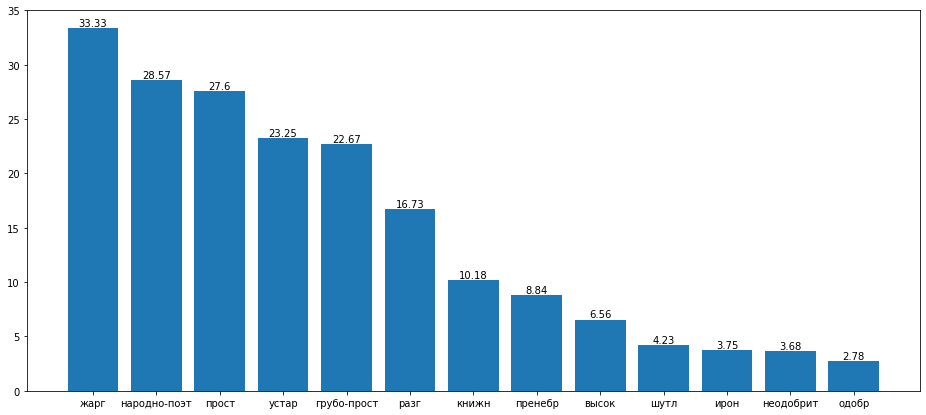

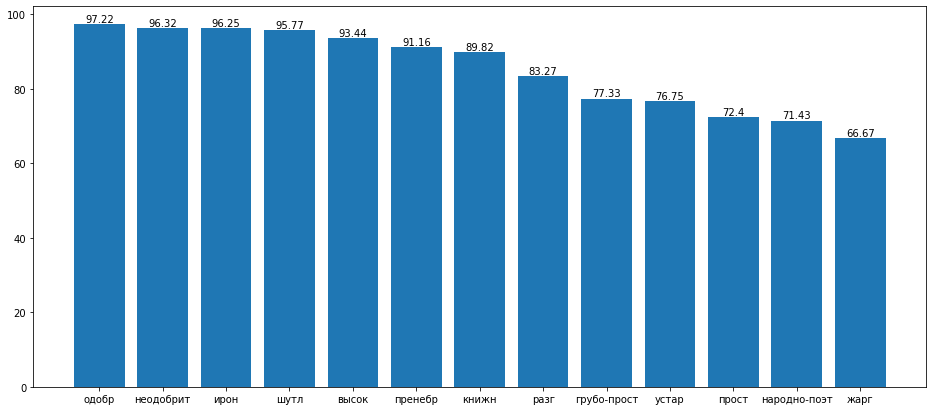

In [49]:
match_100_per = {k: v / total_abbrs[k] * 100 for k, v in match_100.items()}
match_sorted = {k : v for k, v in sorted(match_100_per.items(), key=lambda item: item[1], reverse=True)}

not_match_per = {k: v / total_abbrs[k] * 100 for k, v in not_match.items()}
not_match_sorted = {k : v for k, v in sorted(not_match_per.items(), key=lambda item: item[1], reverse=True) if v != 100}



plt.figure(figsize=(16, 7))
plt.bar(match_sorted.keys(), match_sorted.values())

for i in range(len(match_sorted)):
    plt.annotate(str(round(list(match_sorted.values())[i], 2)), xy=(list(match_sorted.keys())[i], list(match_sorted.values())[i]), ha='center', va='bottom')

plt.show()

plt.figure(figsize=(16, 7))
plt.bar(not_match_sorted.keys(), not_match_sorted.values())

for i in range(len(not_match_sorted)):
    plt.annotate(str(round(list(not_match_sorted.values())[i], 2)), xy=(list(not_match_sorted.keys())[i], list(not_match_sorted.values())[i]), ha='center', va='bottom')
plt.show()


In [50]:
not_match_sorted

{'одобр': 97.22222222222221,
 'неодобрит': 96.32107023411372,
 'иpoн': 96.25360230547551,
 'шутл': 95.77464788732394,
 'высок': 93.44262295081968,
 'пренебр': 91.15646258503402,
 'книжн': 89.82300884955751,
 'разг': 83.26530612244898,
 'грубо-прост': 77.33333333333333,
 'устар': 76.75,
 'прост': 72.39915074309978,
 'народно-поэт': 71.42857142857143,
 'жарг': 66.66666666666666}

In [ ]:
diff